In [ ]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D
from team import get_teams
from mdp import MDP

teams = get_teams("Data/teams_data.csv")
teams = {Id:teams[Id] for Id in range(7)}
team_index = 5
discount = 1
learning_rate = 0.1
epsilon = 0.5
nb_seasons = 10000

mdp = MDP(teams, team_index, discount)
mean_rewards = mdp.q_learning(learning_rate, epsilon, nb_seasons)


Text(0.5,1,'Expected Reward increase with the # of Qlearning iterations')

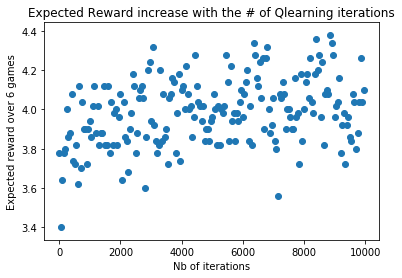

In [2]:
test = []
compression = 50
for i in range(len(mean_rewards)//compression):
    test.append(np.mean(mean_rewards[i*compression:(i+1)*compression]))
plt.scatter([i*50 for i in range(len(test))], test)
plt.xlabel("Nb of iterations")
plt.ylabel("Expected reward over 6 games")
plt.title("Expected Reward increase with the # of Qlearning iterations")

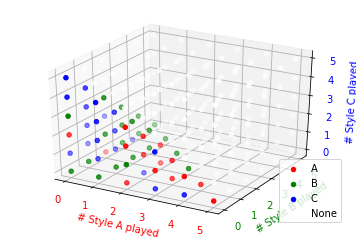

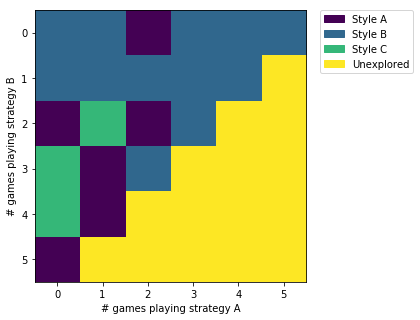

In [3]:


N = len(teams) - 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nas = {"A":[], "B":[], "C":[], "None":[]}
nbs = {"A":[], "B":[], "C":[], "None":[]}
ncs = {"A":[], "B":[], "C":[], "None":[]}
policy_map = np.zeros((N,N,N))
for na in range(N):
    for nb in range(N):
        for nc in range(N):
            
            QA, QB, QC = mdp.Q.loc["(%d, %d, %d)"%(na,nb,nc)]
            policy = np.argmax([QA, QB, QC, 0.000001])
            policy_map[na,nb,nc] = policy
            #value_map[a,b,c] = mdp.Q[card_y*x+y]
            if policy == 0:
                nas["A"].append(na)
                nbs["A"].append(nb)
                ncs["A"].append(nc)
            if policy == 1:
                nas["B"].append(na)
                nbs["B"].append(nb)
                ncs["B"].append(nc)
            if policy == 2:
                nas["C"].append(na)
                nbs["C"].append(nb)
                ncs["C"].append(nc)
            if policy == 3:
                nas["None"].append(na)
                nbs["None"].append(nb)
                ncs["None"].append(nc)
            #c = ["black", "red", "green", "white"][int(policy)]
ax.scatter(nas["A"], nbs["A"], ncs["A"], c="red", label="A")
ax.scatter(nas["B"], nbs["B"], ncs["B"], c="green", label="B")
ax.scatter(nas["C"], nbs["C"], ncs["C"], c="blue", label="C")
ax.scatter(nas["None"], nbs["None"], ncs["None"], c="white", label="None")
ax.legend()
ax.set_xlabel('# Style A played')
ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.yaxis.label.set_color('green')
ax.tick_params(axis='y', colors='green')
ax.zaxis.label.set_color('blue')
ax.tick_params(axis='z', colors='blue')
ax.set_ylabel('# Style B played')
ax.set_zlabel('# Style C played')

ax.grid(True)
plt.show()            

plt.figure(figsize=(5,5))
im = plt.imshow(policy_map[:,:,0], cmap=None, interpolation='nearest')
values = ["Style A", "Style B", "Style C", "Unexplored"]
colors = [ im.cmap(im.norm(value)) for value in range(len(values))]
patches = [ mpatches.Patch(color=colors[i], label="%s"%values[i] ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.xlabel("# games playing strategy A")
plt.ylabel("# games playing strategy B")#
plt.show()

In [4]:
mdp.Q

,A,B,C
"(0, 0, 0)",4.833184,4.902145,4.706357
"(0, 0, 1)",3.887019,3.950410,4.023784
"(0, 0, 2)",3.680358,3.410671,2.832012
"(0, 0, 3)",1.771396,2.778498,1.232540
"(0, 0, 4)",0.416736,0.065132,0.848946
"(0, 0, 5)",0.190000,0.000000,0.468559
"(0, 0, 6)",0.000000,0.000000,0.000000
"(0, 1, 0)",4.121141,4.235022,3.907389
"(0, 1, 1)",2.867946,3.137231,3.201470
"(0, 1, 2)",1.999998,2.588304,3.000000
